*1.1* Data Cleansing

In [ ]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

# This is to clear the warnings from the notebook, usually we should leave this on
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# train_set=pd.read_csv('train.csv')
# test_set=pd.read_csv('test.csv',index_col=0)
train_set = pd.read_csv('/content/train.csv')
test_set = pd.read_csv('/content/test.csv')
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          12941 non-null  object 
 1   description                                   12537 non-null  object 
 2   neighborhood_overview                         8013 non-null   object 
 3   host_name                                     12941 non-null  object 
 4   host_since                                    12941 non-null  object 
 5   host_location                                 12930 non-null  object 
 6   host_about                                    7174 non-null   object 
 7   host_response_time                            5086 non-null   object 
 8   host_response_rate                            5086 non-null   object 
 9   host_acceptance_rate                          5637 non-null  

In [ ]:
train_set.head()

name  \
0                          Freshwater Getaway Home   
1     Alkira Beach House - & Villa -close to Manly   
2                   Chic Relaxed Edgecliff Terrace   
3      Stylish, Unique, Beautiful views, Location.   
4  Rooftop Bondi Oasis with Balcony & Free Parking   

                                         description  \
0  Classic Hamptons furnishings invite relaxation...   
1  鈥淎lkira鈥 is an Aboriginal word for 鈥渂right and...   
2  Spare bedroom in fully-equipped Edgecliff terr...   
3  Interior designed apartment, with a large terr...   
4  Nestled a short stroll from Bondi Beach, this ...   

                               neighborhood_overview host_name host_since  \
0  Less than a minutes walk in friendly neighbour...     Kelly   2017/8/2   
1                                                NaN     Amber  2014/8/27   
2                                                NaN     Simon  2015/3/28   
3  The property is in the fashionable Potts Point...       Cam  2016/11/3   
4  There's good reason, Bondi is Australia's famo...      Alex  2020/3/24   

                                host_location  \
0      Freshwater, New South Wales, Australia   
1          Sydney, New South Wales, Australia   
2     Point Piper, New South Wales, Australia   
3          Sydney, New South Wales, Australia   
4  Bondi Junction, New South Wales, Australia   

                                          host_about host_response_time  \
0  I am a registered nurse, married to a local re...                NaN   
1  Northern beaches family. We love spending time...       within a day   
2                                                NaN                NaN   
3  I'm passionate about Design, food and nature !...     within an hour   
4  Hi, I'm Alex :)\n\nI grew up in Brisbane, but ...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   
1                77%                  30%                 f   
2                NaN                  NaN                 f   
3                75%                 100%                 t   
4                NaN                  NaN                 f   

  host_neighbourhood  host_listings_count  host_total_listings_count  \
0                NaN                    1                          1   
1                NaN                    3                          3   
2          Edgecliff                    2                          2   
3      Woolloomooloo                    1                          1   
4                NaN                    9                          9   

                                  host_verifications host_identity_verified  \
0  ['email', 'phone', 'reviews', 'jumio', 'offlin...                      t   
1  ['email', 'phone', 'reviews', 'jumio', 'offlin...                      t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
3  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
4                                 ['email', 'phone']                      f   

                             neighbourhood neighbourhood_cleansed  \
0   Freshwater, New South Wales, Australia              Warringah   
1                                      NaN              Warringah   
2                                      NaN              Woollahra   
3  Potts Point, New South Wales, Australia                 Sydney   
4  Bondi Beach, New South Wales, Australia               Waverley   

   neighbourhood_group_cleansed   latitude  longitude  \
0                           NaN -33.773850 151.280700   
1                           NaN -33.772780 151.283930   
2                           NaN -33.880650 151.236400   
3                           NaN -33.872570 151.221570   
4                           NaN -33.888850 151.272240   

               property_type        room_type  accommodates bathrooms_text  \
0    Entire residential home  Entire home/apt       

In [ ]:
test_set.head()

id                                               name  \
0   0              Lovely spacious sun- filled apartment   
1   1        Carlingford Cozy Room with private Bathroom   
2   2  Bright and sunny private bedroom at Central Sy...   
3   3                                    Boatshed Bliss!   
4   4                Beach to home in 3 minutes: Bondi N   

                                         description  \
0  Your family will be close to everything when y...   
1  Located perfectly in the centre of Carlingford...   
2  Bright and sunny bedroom in central Sydney. 5 ...   
3  Only one hour from the CBD yet it feels like a...   
4  Charming, bright apt in heart of Nth Bondi__ea...   

                               neighborhood_overview host_name  host_since  \
0  Within minutes walk of Surry Hills which has a...     Maria    2017/8/7   
1                                                NaN    Yueyue   2015/4/29   
2  Supermarket, train station and cafes are all w...       Jun   2017/4/26   
3  When I'm here at Dangar, I feel this place bel...   Barbara  2013/12/19   
4  The appeal of Bondi is not only its beautiful ...    Komang   2012/1/11   

                                host_location  \
0          Sydney, New South Wales, Australia   
1                                          AU   
2          Sydney, New South Wales, Australia   
3          Sydney, New South Wales, Australia   
4  Bondi Junction, New South Wales, Australia   

                                          host_about  host_response_time  \
0  My apartment is a lived-in family sun-drenched...  within a few hours   
1                                                NaN                 NaN   
2                                                Jun                 NaN   
3  Hi ,\r\nI enjoy painting,reading,music and wal...      within an hour   
4  Passionate about travel, music, books, enterta...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 f   
1                NaN                  NaN                 f   
2                NaN                  NaN                 f   
3               100%                  95%                 t   
4                75%                  83%                 f   

        host_neighbourhood  host_listings_count  host_total_listings_count  \
0                      NaN                    0                          0   
1                      NaN                    1                          1   
2  Wollstonecraft/Waverton                    1                          1   
3                      NaN                    1                          1   
4                 Denpasar                    3                          3   

                                  host_verifications host_identity_verified  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
1                                          ['phone']                      f   
2  ['email', 'phone', 'google', 'reviews', 'jumio...                      t   
3  ['email', 'phone', 'reviews', 'jumio', 'offlin...                      t   
4  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   

                                neighbourhood neighbourhood_cleansed  \
0        Waterloo, New South Wales, Australia                 Sydney   
1                                         NaN             Parramatta   
2  Wollstonecraft, New South Wales, Australia           North Sydney   
3   Dangar Island, New South Wales, Australia                Hornsby   
4     North Bondi, New South Wales, Australia               Waverley   

   neighbourhood_group_cleansed   latitude  longitude  \
0                           NaN -33.897440 151.212520   
1                           NaN -33.783620 151.045210   
2                           NaN -33.831160 151.195400   
3                           NaN -33.541440 151.238950   
4                           NaN -33.888590 

In [ ]:
# For the aim to control the number of columns and rows that the python code display
pd.set_option('max_columns', 50)
pd.set_option('max_rows',50)
pd.set_option('display.float_format',lambda x:'%5f'%x)


1.2 Check Data Types

In [ ]:
print('The size of training set:{0}'.format(train_set.shape))
print('The size of testing set:{0}'.format(test_set.shape))

The size of training set:(12941, 61)
The size of testing set:(5547, 61)


In [ ]:
from dabl import detect_types
train_clean = dabl.clean(train_set,verbose = 1)
train_set_types = detect_types(train_set)
train_set_types
#train_clean

Detected feature types:
continuous      20
dirty_float      0
low_card_int    14
categorical     10
date             3
free_string     11
useless          3
dtype: int64


continuous  dirty_float  \
name                                               False        False   
description                                        False        False   
neighborhood_overview                              False        False   
host_name                                          False        False   
host_since                                         False        False   
...                                                  ...          ...   
calculated_host_listings_count_entire_homes        False        False   
calculated_host_listings_count_private_rooms       False        False   
calculated_host_listings_count_shared_rooms        False        False   
reviews_per_month                                   True        False   
price                                               True        False   

                                              low_card_int  categorical  \
name                                                 False        False   
description                                          False        False   
neighborhood_overview                                False        False   
host_name                                            False        False   
host_since                                           False        False   
...                                                    ...          ...   
calculated_host_listings_count_entire_homes           True        False   
calculated_host_listings_count_private_rooms          True        False   
calculated_host_listings_count_shared_rooms          False        False   
reviews_per_month                                    False        False   
price                                                False        False   

                                               date  free_string  useless  
name                                          False         True    False  
description                                   False         True    False  
neighborhood_overview                         False         True    False  
host_name                                     False         True    False  
host_since                                     True        False    False  
...                                             ...          ...      ...  
calculated_host_listings_count_entire_homes   False        False    False  
calculated_host_listings_count_private_rooms  False        False    False  
calculated_host_listings_count_shared_rooms   False        False     True  
reviews_per_month                             False        False    False  
price                                         False        False    False  

[61 rows x 7 columns]

In [ ]:
#useless
train_set_types[train_set_types['useless']==True]

continuous  dirty_float  \
neighbourhood_group_cleansed                      False        False   
has_availability                                  False        False   
calculated_host_listings_count_shared_rooms       False        False   

                                             low_card_int  categorical   date  \
neighbourhood_group_cleansed                        False        False  False   
has_availability                                    False        False  False   
calculated_host_listings_count_shared_rooms         False        False  False   

                                             free_string  useless  
neighbourhood_group_cleansed                       False     True  
has_availability                                   False     True  
calculated_host_listings_count_shared_rooms        False     True

In [ ]:
train_set['neighbourhood_group_cleansed'].value_counts()

Series([], Name: neighbourhood_group_cleansed, dtype: int64)

In [ ]:
train_set['has_availability'].value_counts()

t    12761
f      180
Name: has_availability, dtype: int64

In [ ]:
train_set['calculated_host_listings_count_shared_rooms'].value_counts()

0    12781
1      109
7       13
3       11
8       10
2        9
4        5
6        3
Name: calculated_host_listings_count_shared_rooms, dtype: int64

In [ ]:
# drop the useless column
useless_data= train_set_types[train_set_types['useless']==True].index
useless_data

Index(['neighbourhood_group_cleansed', 'has_availability',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [ ]:
dabl_train_set=train_set.drop(['neighbourhood_group_cleansed', 'has_availability',
       'calculated_host_listings_count_shared_rooms'],axis=1)
dabl_test_set=test_set.drop(['neighbourhood_group_cleansed', 'has_availability',
       'calculated_host_listings_count_shared_rooms'],axis=1)

In [ ]:
train_set_types[train_set_types['date']==True]

continuous  dirty_float  low_card_int  categorical  date  \
host_since         False        False         False        False  True   
first_review       False        False         False        False  True   
last_review        False        False         False        False  True   

              free_string  useless  
host_since          False    False  
first_review        False    False  
last_review         False    False

In [ ]:
dabl_train_set.to_csv('dabl_train_set.csv')

In [ ]:
dabl_test_set.to_csv('dabl_test_set.csv')

In [ ]:

dabl_train_set['host_acceptance_rate']=dabl_train_set['host_acceptance_rate'].astype(str).apply(lambda x :x.replace('%','')).astype(float)
dabl_train_set['host_response_rate']=dabl_train_set['host_response_rate'].astype(str).apply(lambda x :x.replace('%','')).astype(float)


In [ ]:
dabl_train_set['host_acceptance_rate']

0              NaN
1        30.000000
2              NaN
3       100.000000
4              NaN
           ...    
12936          NaN
12937    99.000000
12938    71.000000
12939   100.000000
12940          NaN
Name: host_acceptance_rate, Length: 12941, dtype: float64

In [ ]:
dabl_train_set['host_response_rate']

0              NaN
1        77.000000
2              NaN
3        75.000000
4              NaN
           ...    
12936          NaN
12937   100.000000
12938   100.000000
12939   100.000000
12940          NaN
Name: host_response_rate, Length: 12941, dtype: float64

In [ ]:

dabl_train_set['host_since']=pd.to_datetime(dabl_train_set['host_since'])
print(dabl_train_set['host_since'].max())
dabl_train_set['host_since']=dabl_train_set['host_since'].apply(lambda x :dabl_train_set['host_since'].max()-x).dt.days
dabl_train_set['host_since']

2021-11-29 00:00:00


0        1580
1        2651
2        2438
3        1852
4         615
         ... 
12936    3514
12937    2251
12938    2757
12939     182
12940    1742
Name: host_since, Length: 12941, dtype: int64

In [ ]:

dabl_train_set['price']=dabl_train_set['price'].astype(str).apply(lambda x :x.replace('$',''))
dabl_train_set['price']=dabl_train_set['price'].astype(str).apply(lambda x :x.replace(',','')).astype(float)
dabl_train_set['price']=dabl_train_set['price'].astype(int)
dabl_train_set['price']

0        1129
1         950
2          94
3         175
4         269
         ... 
12936     250
12937     289
12938     195
12939     138
12940      59
Name: price, Length: 12941, dtype: int64

In [ ]:
def IsFloatNum(str):
  if str.count('.') == 1:
    return True
  else:
    return False

In [ ]:

for i in range(dabl_train_set.shape[0]):
    dabl_train_set.loc[i,'bathrooms_text']=str(dabl_train_set.loc[i,'bathrooms_text']).split()[0]
    if dabl_train_set.loc[i,'bathrooms_text'].isdigit()==False and IsFloatNum(dabl_train_set.loc[i,'bathrooms_text'])==False:
        dabl_train_set.loc[i,'bathrooms_text']=0.5
        
dabl_train_set['bathrooms_text']=dabl_train_set['bathrooms_text'].astype(float)

In [ ]:
dabl_train_set['bathrooms_text']

0       2.000000
1       2.500000
2       1.000000
3       1.500000
4       2.000000
          ...   
12936   1.000000
12937   1.000000
12938   2.000000
12939   1.000000
12940   1.000000
Name: bathrooms_text, Length: 12941, dtype: float64

In [ ]:
(test set)
dabl_test_set['host_acceptance_rate']=dabl_test_set['host_acceptance_rate'].astype(str).apply(lambda x :x.replace('%','')).astype(float)
dabl_test_set['host_response_rate']=dabl_test_set['host_response_rate'].astype(str).apply(lambda x :x.replace('%','')).astype(float)

In [ ]:

dabl_test_set['host_since']=pd.to_datetime(dabl_test_set['host_since'])
print(dabl_test_set['host_since'].max())
dabl_test_set['host_since']=dabl_test_set['host_since'].apply(lambda x :dabl_test_set['host_since'].max()-x).dt.days

2021-11-26 00:00:00


In [ ]:

for i in range(dabl_test_set.shape[0]):
    dabl_test_set.loc[i,'bathrooms_text']=str(dabl_test_set.loc[i,'bathrooms_text']).split()[0]
    if dabl_test_set.loc[i,'bathrooms_text'].isdigit()==False and IsFloatNum(dabl_test_set.loc[i,'bathrooms_text'])==False:
        dabl_test_set.loc[i,'bathrooms_text']=0.5
        
dabl_test_set['bathrooms_text']=dabl_test_set['bathrooms_text'].astype(float)

<function matplotlib.pyplot.show>

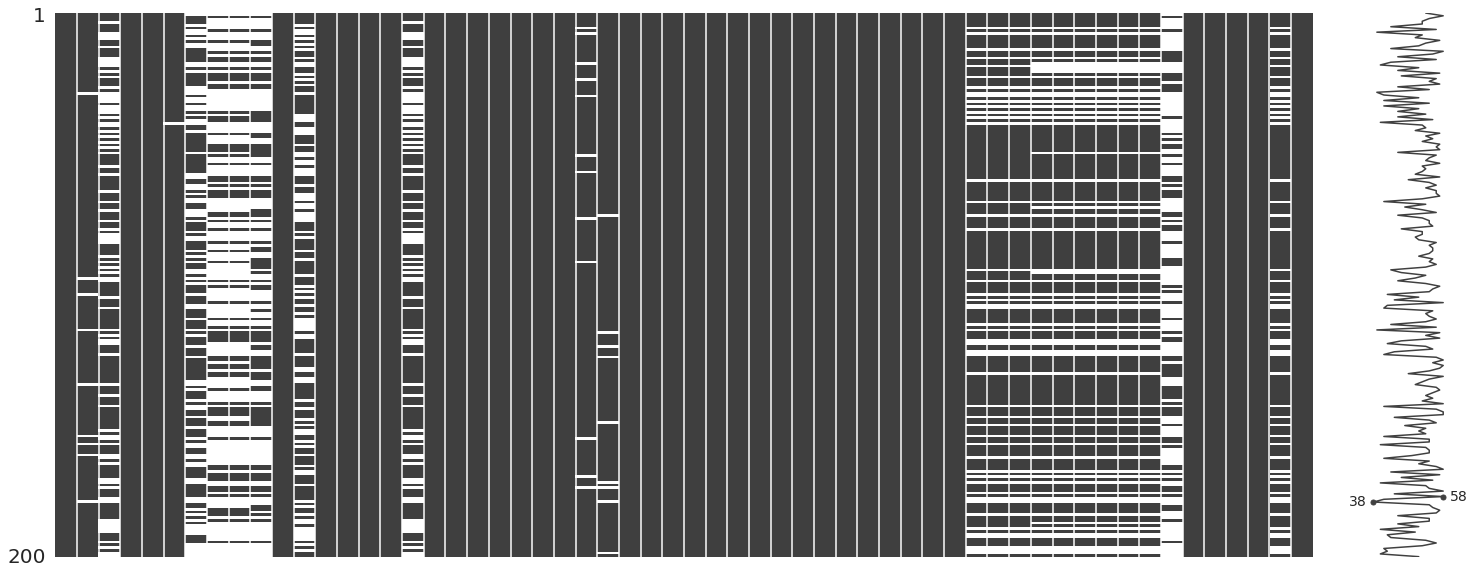

In [ ]:

import missingno as msno
msno.matrix(dabl_train_set.sample(200))
plt.show

In [ ]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'review_scores...ion'
E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'review_scores...ion'
E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'review_scores...ion'



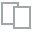
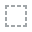
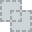
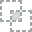
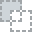
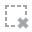
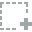
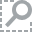
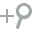
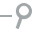
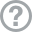
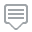
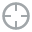
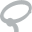
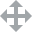
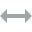
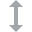
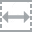
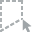
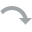
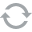
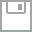
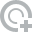
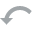
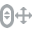
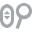
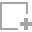
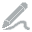
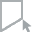
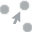
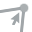
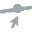

In [ ]:
from dataprep.eda.missing import plot_missing
plot_missing(dabl_train_set)

In [ ]:

dabl_train_set.isnull().sum().sort_values(ascending=False)

license                   8048
host_response_time        7855
host_response_rate        7855
host_acceptance_rate      7304
host_about                5767
                          ... 
maximum_nights               0
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_maximum_nights       0
price                        0
Length: 58, dtype: int64

In [ ]:
dabl_test_set.isnull().sum().sort_values(ascending=False)

license                   3355
host_response_time        3324
host_response_rate        3324
host_acceptance_rate      3105
host_about                2485
                          ... 
name                         0
minimum_minimum_nights       0
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_nights               0
Length: 58, dtype: int64

In [ ]:

fill_none=['neighborhood_overview','host_response_time','host_neighbourhood','neighbourhood','description','license','host_location']
dabl_train_set[fill_none]= dabl_train_set[fill_none].fillna('none')

fill_0= ['reviews_per_month', 'host_response_rate', 'host_acceptance_rate','host_about']
dabl_train_set[fill_0]= dabl_train_set[fill_0].fillna(0)

dabl_train_set['bedrooms'] = dabl_train_set['bedrooms'].fillna(dabl_train_set['bedrooms'].median())
dabl_train_set['beds'] = dabl_train_set['beds'].fillna(dabl_train_set['beds'].median())
fill_media=['review_scores_value','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location']
dabl_train_set[fill_media] = dabl_train_set[fill_media].fillna(dabl_train_set[fill_media].median())


dabl_train_set['last_review'] = pd.to_datetime(dabl_train_set['last_review'])
dabl_train_set['first_review'] = pd.to_datetime(dabl_train_set['first_review'])
dabl_train_set['review_gap'] = (dabl_train_set['last_review'] -dabl_train_set['first_review'] )


In [ ]:

dabl_train_set['review_gap']=dabl_train_set['review_gap'].dt.days

dabl_train_set['review_gap']=dabl_train_set['review_gap'].fillna(dabl_train_set['review_gap'].mean())

In [ ]:

dabl_train_set=dabl_train_set.drop(['last_review', 'first_review'],axis=1)

In [ ]:
dabl_train_set.isnull().sum().sort_values(ascending=False)

name                      0
minimum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
                         ..
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
review_gap                0
Length: 57, dtype: int64

In [ ]:

fill_none=['neighborhood_overview','host_response_time','host_neighbourhood','neighbourhood','description','license','host_location']
dabl_test_set[fill_none]= dabl_test_set[fill_none].fillna('none')

fill_0= ['reviews_per_month', 'host_response_rate', 'host_acceptance_rate','host_about','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']
dabl_test_set[fill_0]= dabl_test_set[fill_0].fillna(0)

dabl_test_set['bedrooms'] = dabl_test_set['bedrooms'].fillna(dabl_test_set['bedrooms'].median())
dabl_test_set['beds'] = dabl_test_set['beds'].fillna(dabl_test_set['beds'].median())
fill_media=['review_scores_value','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location']
dabl_test_set[fill_media] = dabl_test_set[fill_media].fillna(dabl_test_set[fill_media].median())


dabl_test_set['last_review'] = pd.to_datetime(dabl_test_set['last_review'])
dabl_test_set['first_review'] = pd.to_datetime(dabl_test_set['first_review'])
dabl_test_set['review_gap'] = (dabl_test_set['last_review'] -dabl_test_set['first_review'] )

In [ ]:

dabl_test_set['review_gap']=dabl_test_set['review_gap'].dt.days

dabl_test_set['review_gap']=dabl_test_set['review_gap'].fillna(dabl_test_set['review_gap'].mean())

In [ ]:
 
dabl_test_set=dabl_test_set.drop(['last_review', 'first_review'],axis=1)

In [ ]:
dabl_train_set.isnull().sum().sort_values(ascending=False)

name                      0
minimum_minimum_nights    0
minimum_maximum_nights    0
maximum_maximum_nights    0
minimum_nights_avg_ntm    0
                         ..
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
review_gap                0
Length: 57, dtype: int64

In [ ]:
#（train set）
dabl_train_set = dabl_train_set.dropna()
print(dabl_train_set.shape)

(12941, 57)


1.4 feature engineering and EDA


In [ ]:
feature_engineering_train_set=dabl_train_set.copy()
feature_engineering_test_set=dabl_test_set.copy()
print(feature_engineering_train_set.columns)
feature_engineering_train_set.T.iloc[:,0:5]

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanli

0  \
name                                                                    Freshwater Getaway Home   
description                                   Classic Hamptons furnishings invite relaxation...   
neighborhood_overview                         Less than a minutes walk in friendly neighbour...   
host_name                                                                                 Kelly   
host_since                                                                                 1580   
...                                                                                         ...   
calculated_host_listings_count_entire_homes                                                   1   
calculated_host_listings_count_private_rooms                                                  0   
reviews_per_month                                                                      0.120000   
price                                                                                      1129   
review_gap                                                                           740.000000   

                                                                                              1  \
name                                               Alkira Beach House - & Villa -close to Manly   
description                                   鈥淎lkira鈥 is an Aboriginal word for 鈥渂right and...   
neighborhood_overview                                                                      none   
host_name                                                                                 Amber   
host_since                                                                                 2651   
...                                                                                         ...   
calculated_host_listings_count_entire_homes                                                   3   
calculated_host_listings_count_private_rooms                                                  0   
reviews_per_month                                                                      0.000000   
price                                                                                       950   
review_gap                                                                           575.195099   

                                                                                              2  \
name                                                             Chic Relaxed Edgecliff Terrace   
description                                   Spare bedroom in fully-equipped Edgecliff terr...   
neighborhood_overview                                                                      none   
host_name                                                                                 Simon   
host_since                                                                                 2438   
...                                                                                         ...   
calculated_host_listings_count_entire_homes                                                   1   
calculated_host_listings_count_private_rooms                                                  1   
reviews_per_month                                                                      0.000000   
price                                                                                        94   
review_gap                                                                           575.195099   

                                                                                              3  \
name                                                Stylish, Unique, Beautiful views, Location.   
description                                   Interior designed apartment, with a large terr...   
neighborhood_overview                         The property is in the fashionable Potts Point...   
host_name                                                                                   Cam   
host_since                      

1.4.1 response transformation 


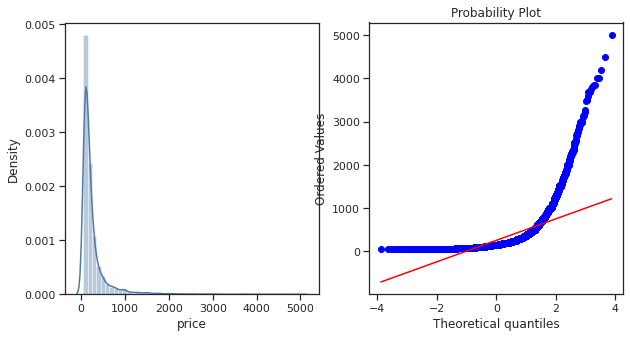

In [ ]:

from scipy import stats
response = 'price'
plt.figure(figsize = (10,5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(feature_engineering_train_set[response])

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(feature_engineering_train_set[response], plot= plt)

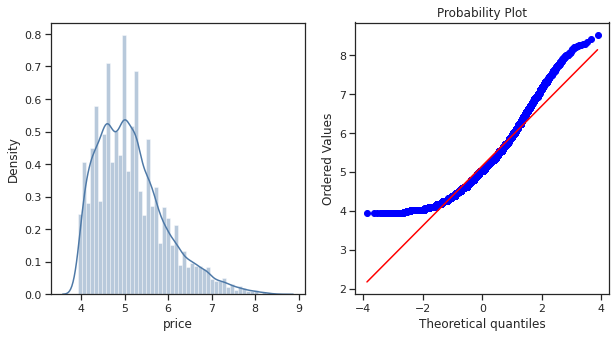

In [ ]:
feature_engineering_train_set[response] = np.log(feature_engineering_train_set[response] )
plt.figure(figsize = (10,5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(feature_engineering_train_set[response])

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(feature_engineering_train_set[response], plot= plt)

In [ ]:
#positive_tweets = feature_engineering_train_set['room_type']
#positive_tweets = ' '.join(positive_tweets)

#from wordcloud import WordCloud

#fig, ax = plt.subplots(figsize=(10,8))
#wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(positive_tweets)
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

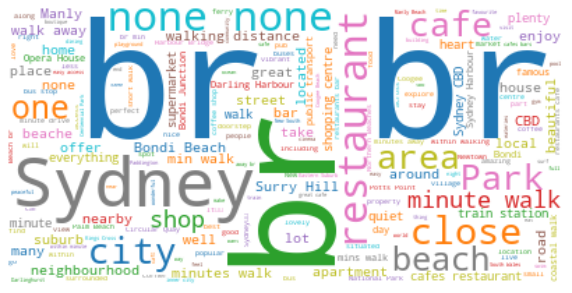

In [ ]:
positive_tweets = feature_engineering_train_set['neighborhood_overview']
positive_tweets = ' '.join(positive_tweets)

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize=(10,8))
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(positive_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

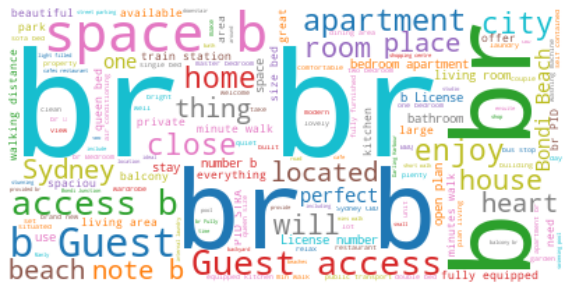

In [ ]:
positive_tweets = feature_engineering_train_set['description']
positive_tweets = ' '.join(positive_tweets)

from wordcloud import WordCloud

fig, ax = plt.subplots(figsize=(10,8))
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(positive_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

feature_engineering_train_set['neighborhood_overview'] =feature_engineering_train_set['neighborhood_overview'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
feature_engineering_train_set['neighborhood_overview']


0        0
1        0
2        0
3        0
4        0
        ..
12936    0
12937    1
12938    0
12939    0
12940    0
Name: neighborhood_overview, Length: 12941, dtype: int64

In [ ]:
feature_engineering_test_set['neighborhood_overview'] =feature_engineering_test_set['neighborhood_overview'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
feature_engineering_test_set['neighborhood_overview']

0       1
1       0
2       0
3       0
4       0
       ..
5542    0
5543    0
5544    0
5545    0
5546    0
Name: neighborhood_overview, Length: 5547, dtype: int64

In [ ]:

feature_engineering_train_set['name'] =feature_engineering_train_set['name'] .apply(lambda sen: len([x for x in sen.split() if x. isupper()]))
feature_engineering_train_set['name']


0        0
1        0
2        0
3        0
4        0
        ..
12936    1
12937    0
12938    0
12939    0
12940    0
Name: name, Length: 12941, dtype: int64

In [ ]:
feature_engineering_test_set['name'] =feature_engineering_test_set['name'] .apply(lambda sen: len([x for x in sen.split() if x. isupper()]))
feature_engineering_test_set['name']

0       0
1       0
2       0
3       0
4       1
       ..
5542    0
5543    0
5544    0
5545    0
5546    0
Name: name, Length: 5547, dtype: int64

In [ ]:

feature_engineering_train_set['host_verifications'] =feature_engineering_train_set['host_verifications'] .apply(lambda x: len(x.split(',')))
feature_engineering_train_set['amenities'] =feature_engineering_train_set['amenities'] .apply(lambda x: len(x.split(',')))



In [ ]:
feature_engineering_test_set['host_verifications'] =feature_engineering_test_set['host_verifications'] .apply(lambda x: len(x.split(',')))
feature_engineering_test_set['amenities'] =feature_engineering_test_set['amenities'] .apply(lambda x: len(x.split(',')))

In [ ]:

feature_engineering_train_set['host_together_t'] = (feature_engineering_train_set['host_neighbourhood'] == feature_engineering_train_set['neighbourhood']).astype(int)
feature_engineering_train_set = feature_engineering_train_set.drop(['host_neighbourhood','neighbourhood'],axis = 1)


In [ ]:

feature_engineering_test_set['host_together_t'] = (feature_engineering_test_set['host_neighbourhood'] == feature_engineering_test_set['neighbourhood']).astype(int)
feature_engineering_test_set = feature_engineering_test_set.drop(['host_neighbourhood','neighbourhood'],axis = 1)

In [ ]:

import re
count_new_train = []
for i in feature_engineering_train_set['description']:
    result_train= re.findall(r'(new| comfort|good|nice|enjoy|close)', i)
    count_rev_train = len(result_train)
    count_new_train.append(count_rev_train)
feature_engineering_train_set['description'] = count_new_train

In [ ]:

import re
count_new_test = []
for i in feature_engineering_test_set['description']:
    result_test= re.findall(r'(new| comfort|good|nice|enjoy|close)', i)
    count_rev_test = len(result_test)
    count_new_test.append(count_rev_test)
feature_engineering_test_set['description'] = count_new_test

1.4.3 encoding

1. ordinal encoding

In [ ]:
print(feature_engineering_train_set['host_response_time'].value_counts())

none                  7855
within an hour        2891
within a few hours    1069
within a day           791
a few days or more     335
Name: host_response_time, dtype: int64


<function matplotlib.pyplot.show>

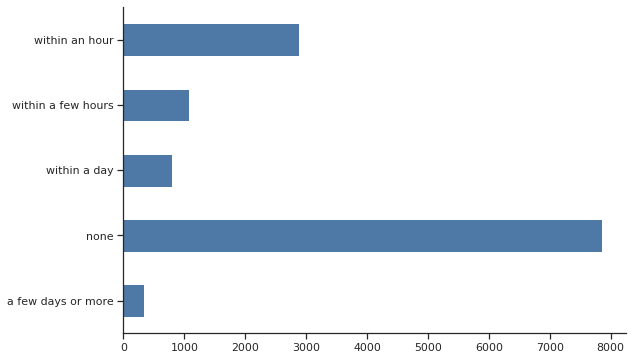

In [ ]:
feature_engineering_train_set['host_response_time'].value_counts().sort_index().plot(kind='barh')
sns.despine()
plt.show

In [ ]:
response_time_keys={'none':1,'a few days or more':2,'within a day':3, 'within a few hours':4, 'within an hour':5}
feature_engineering_train_set['host_response_time']= feature_engineering_train_set['host_response_time'].replace(response_time_keys)
feature_engineering_test_set['host_response_time']= feature_engineering_test_set['host_response_time'].replace(response_time_keys)


2. nominal encoding

<function matplotlib.pyplot.show>

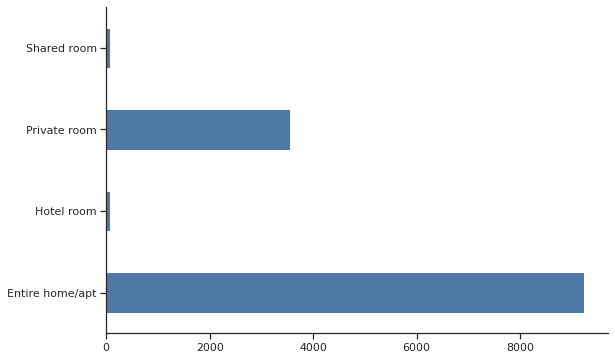

In [ ]:
# sparse label
feature_engineering_train_set['room_type'].value_counts().sort_index().plot(kind='barh')
sns.despine()
plt.show

In [ ]:
feature_engineering_train_set['room_type'].value_counts()


Entire home/apt    9247
Private room       3551
Shared room          73
Hotel room           70
Name: room_type, dtype: int64

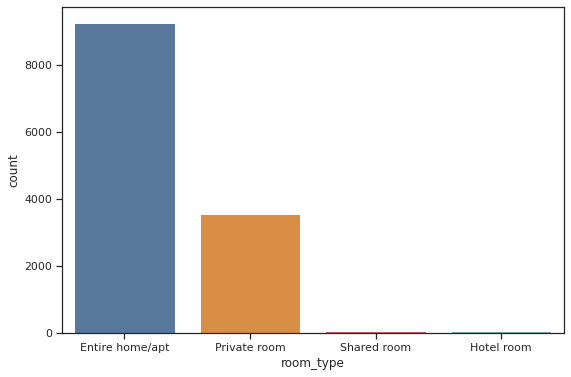

In [ ]:
sns.countplot(feature_engineering_train_set['room_type'].astype(object))
plt.show()

In [ ]:
room_types_keys={'Entire home/apt':1,'Private room':2,'Shared room':3, 'Hotel room':3}
feature_engineering_train_set['room_type']= feature_engineering_train_set['room_type'].replace(room_types_keys)
feature_engineering_test_set['room_type']= feature_engineering_test_set['room_type'].replace(room_types_keys)

In [ ]:
feature_engineering_test_set['room_type']

0       1
1       2
2       2
3       1
4       1
       ..
5542    1
5543    2
5544    1
5545    2
5546    2
Name: room_type, Length: 5547, dtype: int64

In [ ]:
feature_engineering_train_set['property_type'].value_counts()

Entire rental unit                  5659
Entire residential home             2138
Private room in rental unit         1763
Private room in residential home    1113
Entire guest suite                   281
                                    ... 
Camper/RV                              1
Shared room in townhouse               1
Private room in farm stay              1
Cave                                   1
Campsite                               1
Name: property_type, Length: 71, dtype: int64

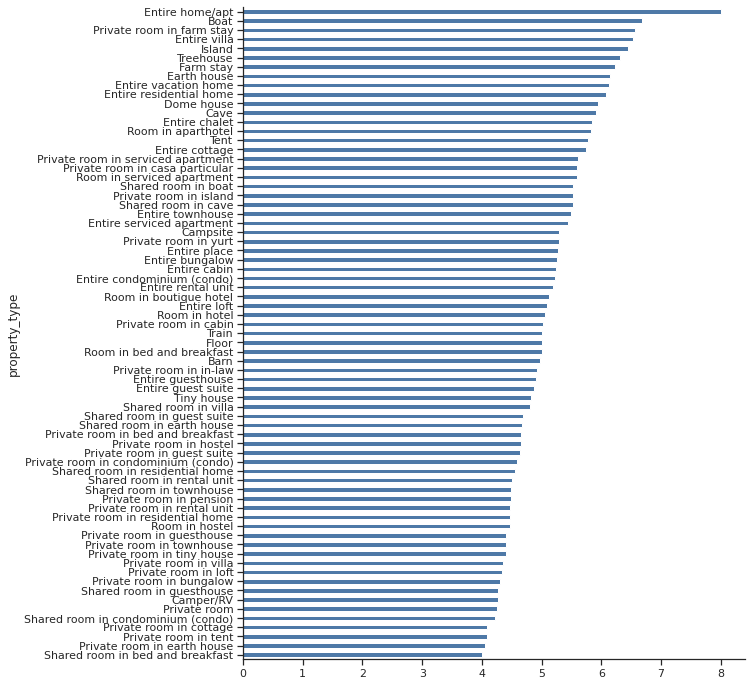

In [ ]:
feature_engineering_train_set.groupby('property_type')['price'].mean(). sort_values().plot(kind= 'barh', figsize=(9,12))
sns.despine()
plt.show()

In [ ]:

property_name =feature_engineering_train_set['property_type'].value_counts().index[:5]
for i in range (feature_engineering_train_set.shape[0]):
    if feature_engineering_train_set['property_type'].iloc[i] in property_name:
        pass
    else:
        feature_engineering_train_set['property_type'].iloc[i] = 'Other'

In [ ]:
feature_engineering_test_set['property_type']

0                     Entire rental unit
1            Private room in rental unit
2            Private room in rental unit
3                         Entire cottage
4                     Entire rental unit
                      ...               
5542             Entire residential home
5543    Private room in residential home
5544                  Entire rental unit
5545              Room in boutique hotel
5546         Private room in rental unit
Name: property_type, Length: 5547, dtype: object

In [ ]:
feature_engineering_test_set.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
 

In [ ]:
#test set
for i in range (feature_engineering_test_set.shape[0]):
    if  feature_engineering_test_set['property_type'].iloc[i] in property_name:
        pass
    else:
         feature_engineering_test_set['property_type'].iloc[i] = 'Other'

In [ ]:
feature_engineering_train_set['property_type'].value_counts()

Entire rental unit                  5659
Entire residential home             2138
Other                               1987
Private room in rental unit         1763
Private room in residential home    1113
Entire guest suite                   281
Name: property_type, dtype: int64

In [ ]:
feature_engineering_test_set['property_type'].value_counts()

Entire rental unit                  2465
Entire residential home              934
Other                                808
Private room in rental unit          741
Private room in residential home     476
Entire guest suite                   123
Name: property_type, dtype: int64

In [ ]:
feature_engineering_train_set['room_type'].value_counts()


1    9247
2    3551
3     143
Name: room_type, dtype: int64

In [ ]:
feature_engineering_test_set['neighbourhood_cleansed'].value_counts()

Sydney              1339
Waverley             790
Randwick             472
Manly                310
Warringah            288
Pittwater            260
North Sydney         224
Woollahra            224
Marrickville         162
Leichhardt           132
Botany Bay           106
Sutherland Shire     105
Rockdale             104
Willoughby            81
Ryde                  80
Mosman                79
Hornsby               76
Parramatta            76
Canada Bay            73
Auburn                66
Ku-Ring-Gai           46
Canterbury            44
Lane Cove             43
Blacktown             40
Burwood               40
The Hills Shire       35
Ashfield              33
Penrith               31
Strathfield           29
City Of Kogarah       27
Bankstown             26
Hurstville            26
Liverpool             19
Fairfield             18
Camden                16
Hunters Hill          10
Campbelltown           9
Holroyd                8
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
neighbourhood_name = feature_engineering_train_set['neighbourhood_cleansed'].value_counts().index[:19]
feature_engineering_train_set['neighbourhood_cleansed']=feature_engineering_train_set['neighbourhood_cleansed'].apply(lambda x: 'Other' if x not in neighbourhood_name else x)
feature_engineering_test_set['neighbourhood_cleansed']=feature_engineering_test_set['neighbourhood_cleansed'].apply(lambda x: 'Other' if x not in neighbourhood_name else x)

In [ ]:
feature_engineering_test_set['neighbourhood_cleansed'].value_counts()

Sydney              1339
Waverley             790
Other                573
Randwick             472
Manly                310
Warringah            288
Pittwater            260
North Sydney         224
Woollahra            224
Marrickville         162
Leichhardt           132
Botany Bay           106
Sutherland Shire     105
Rockdale             104
Willoughby            81
Ryde                  80
Mosman                79
Parramatta            76
Hornsby               76
Auburn                66
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
feature_engineering_train_set['license'].value_counts()
feature_engineering_train_set['license']=feature_engineering_train_set['license'].apply(lambda x: 'Have license' if x != 'none' else x)
feature_engineering_test_set['license']=feature_engineering_test_set['license'].apply(lambda x: 'Have license' if x != 'none' else x)

In [ ]:
feature_engineering_test_set['license']

0       Have license
1               none
2               none
3       Have license
4       Have license
            ...     
5542            none
5543            none
5544    Have license
5545    Have license
5546            none
Name: license, Length: 5547, dtype: object

In [ ]:
feature_engineering_test_set.head()

id  name  description  neighborhood_overview host_name  host_since  \
0   0     0            2                      1     Maria        1572   
1   1     0            2                      0    Yueyue        2403   
2   2     0            0                      0       Jun        1675   
3   3     0            0                      0   Barbara        2899   
4   4     1            5                      0    Komang        3607   

                                host_location  \
0          Sydney, New South Wales, Australia   
1                                          AU   
2          Sydney, New South Wales, Australia   
3          Sydney, New South Wales, Australia   
4  Bondi Junction, New South Wales, Australia   

                                          host_about  host_response_time  \
0  My apartment is a lived-in family sun-drenched...                   4   
1                                                  0                   1   
2                                                Jun                   1   
3  Hi ,\r\nI enjoy painting,reading,music and wal...                   5   
4  Passionate about travel, music, books, enterta...                   4   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0          100.000000            100.000000                 f   
1            0.000000              0.000000                 f   
2            0.000000              0.000000                 f   
3          100.000000             95.000000                 t   
4           75.000000             83.000000                 f   

   host_listings_count  host_total_listings_count  host_verifications  \
0                    0                          0                   7   
1                    1                          1                   1   
2                    1                          1                   9   
3                    1                          1                   8   
4                    3                          3                   8   

  host_identity_verified neighbourhood_cleansed   latitude  longitude  \
0                      t                 Sydney -33.897440 151.212520   
1                      f             Parramatta -33.783620 151.045210   
2                      t           North Sydney -33.831160 151.195400   
3                      t                Hornsby -33.541440 151.238950   
4                      t               Waverley -33.888590 151.282230   

                 property_type  room_type  accommodates  bathrooms_text  \
0           Entire rental unit          1             4        2.000000   
1  Private room in rental unit          2             2        1.000000   
2  Private room in rental unit          2             1        1.000000   
3                        Other          1             3        1.000000   
4           Entire rental unit          1             3        1.000000   

   bedrooms     beds  ...  maximum_maximum_nights  minimum_nights_avg_ntm  \
0  2.000000 2.000000  ...                      21                6.900000   
1  1.000000 1.000000  ...                    1125               90.000000   
2  1.000000 1.000000  ...                    1125               90.000000   
3  1.000000 2.000000  ...                      21                2.300000   
4  2.000000 3.000000  ...                    1125                3.300000   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0               20.600000               14               16               16   
1             1125.000000                0                0                0   
2             1125.000000               29               59               89   
3               21.000000                5               15               39   
4              966.200000                0               25               55   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0                16                  0                      0   
1                 

Get dummies

In [ ]:
feature_engineering_train_set=feature_engineering_train_set.drop(['host_name', 'host_location','host_about'],axis=1)

In [ ]:
feature_engineering_test_set=feature_engineering_test_set.drop(['host_name', 'host_location','host_about'],axis=1)

In [ ]:
feature_engineering_train_set.head()

name  description  neighborhood_overview  host_since  host_response_time  \
0     0            0                      0        1580                   1   
1     0            1                      0        2651                   3   
2     0            2                      0        2438                   1   
3     0            0                      0        1852                   5   
4     0            3                      0         615                   1   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0            0.000000              0.000000                 f   
1           77.000000             30.000000                 f   
2            0.000000              0.000000                 f   
3           75.000000            100.000000                 t   
4            0.000000              0.000000                 f   

   host_listings_count  host_total_listings_count  host_verifications  \
0                    1                          1                   7   
1                    3                          3                   8   
2                    2                          2                   5   
3                    1                          1                   6   
4                    9                          9                   2   

  host_identity_verified neighbourhood_cleansed   latitude  longitude  \
0                      t              Warringah -33.773850 151.280700   
1                      t              Warringah -33.772780 151.283930   
2                      t              Woollahra -33.880650 151.236400   
3                      t                 Sydney -33.872570 151.221570   
4                      f               Waverley -33.888850 151.272240   

             property_type  room_type  accommodates  bathrooms_text  bedrooms  \
0  Entire residential home          1             7        2.000000  4.000000   
1  Entire residential home          1            13        2.500000  4.000000   
2                    Other          2             2        1.000000  1.000000   
3       Entire rental unit          1             2        1.500000  1.000000   
4       Entire rental unit          1             4        2.000000  2.000000   

      beds  amenities  minimum_nights  maximum_nights  minimum_minimum_nights  \
0 4.000000         37              90            1125                      90   
1 6.000000         51               7            1125                       7   
2 2.000000          9              90            1125                      90   
3 1.000000         37              14            1125                      14   
4 2.000000         46               2              90                       2   

   ...  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
0  ...               90.000000             1125.000000                0   
1  ...                7.000000             1125.000000                0   
2  ...               90.000000             1125.000000                0   
3  ...               14.000000             1125.000000                2   
4  ...                8.700000               90.000000                0   

   availability_60  availability_90  availability_365  number_of_reviews  \
0                0                0                 0                  6   
1                5               30               305                  0   
2                0                0                 0                  0   
3                7               12                12                 69   
4                0                0                 0                137   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0              5.000000   
1                      0                       0              4.820000   
2                      0                       0              4.820000   
3                     12                       2              4.960000   
4      

In [ ]:
#get dummy
feature_engineering_dummy_train_set = pd.get_dummies(feature_engineering_train_set, drop_first =True)
feature_engineering_dummy_test_set = pd.get_dummies(feature_engineering_test_set, drop_first =True)

In [ ]:
feature_engineering_dummy_test_set.to_csv('feature_engineering_dummy_test_set.csv')

In [ ]:
feature_engineering_dummy_train_set.to_csv('feature_engineering_dummy_train_set.csv')

In [ ]:
#Check Test set and Train set
test_del = []
for i in feature_engineering_dummy_test_set.columns:
    if i not in feature_engineering_dummy_train_set.columns:
        test_del.append(i)
test_del



['id']

In [ ]:
train_del = []
for i in feature_engineering_dummy_train_set.columns:
    if i not in feature_engineering_dummy_test_set.columns:
        train_del.append(i)
train_del



['price']

1.5.1 statistical EDA

In [ ]:
descriptive = feature_engineering_dummy_train_set.describe()
descriptive.loc['skew',:]= feature_engineering_dummy_train_set.skew()
descriptive.loc['kurt',:]= feature_engineering_dummy_train_set.kurt()
descriptive.round(3)

name  description  neighborhood_overview   host_since  \
count 12941.000000 12941.000000           12941.000000 12941.000000   
mean      0.353000     1.069000               0.409000  2105.657000   
std       1.082000     1.220000               1.096000   850.111000   
min       0.000000     0.000000               0.000000     0.000000   
25%       0.000000     0.000000               0.000000  1474.000000   
50%       0.000000     1.000000               0.000000  2184.000000   
75%       0.000000     2.000000               0.000000  2714.000000   
max      10.000000     9.000000              17.000000  4549.000000   
skew      4.454000     1.328000               5.147000    -0.127000   
kurt     22.641000     2.043000              43.080000    -0.496000   

       host_response_time  host_response_rate  host_acceptance_rate  \
count        12941.000000        12941.000000          12941.000000   
mean             2.290000           35.516000             33.630000   
std              1.710000           46.685000             43.604000   
min              1.000000            0.000000              0.000000   
25%              1.000000            0.000000              0.000000   
50%              1.000000            0.000000              0.000000   
75%              4.000000          100.000000             88.000000   
max              5.000000          100.000000            100.000000   
skew             0.716000            0.581000              0.624000   
kurt            -1.310000           -1.627000             -1.494000   

       host_listings_count  host_total_listings_count  host_verifications  \
count         12941.000000               12941.000000        12941.000000   
mean             11.660000                  11.660000            5.302000   
std              43.015000                  43.015000            2.112000   
min               0.000000                   0.000000            1.000000   
25%               1.000000                   1.000000            4.000000   
50%               1.000000                   1.000000            6.000000   
75%               3.000000                   3.000000            7.000000   
max             457.000000                 457.000000           11.000000   
skew              6.310000                   6.310000           -0.254000   
kurt             44.340000                  44.340000           -0.704000   

          latitude    longitude    room_type  accommodates  bathrooms_text  \
count 12941.000000 12941.000000 12941.000000  12941.000000    12941.000000   
mean    -33.858000   151.204000     1.296000      3.569000        1.377000   
std       0.080000     0.089000     0.480000      2.194000        0.698000   
min     -34.092000   150.630000     1.000000      1.000000        0.000000   
25%     -33.898000   151.180000     1.000000      2.000000        1.000000   
50%     -33.881000   151.217000     1.000000      3.000000        1.000000   
75%     -33.824000   151.264000     2.000000      4.000000        2.000000   
max     -33.399000   151.340000     3.000000     16.000000       19.000000   
skew      1.165000    -2.227000     1.187000      1.510000        3.153000   
kurt      2.858000     7.595000     0.116000      2.884000       36.066000   

          bedrooms         beds    amenities  minimum_nights  maximum_nights  \
count 12941.000000 12941.000000 12941.000000    12941.000000    12941.000000   
mean      1.718000     2.107000    23.676000       60.230000      897.749000   
std       1.038000     1.497000    12.530000       51.518000      413.525000   
min       1.000000     1.000000     1.000000        1.000000        1.000000   
25%       1.000000     1.000000    14.000000        3.000000     1124.000000   
50%       1.000000     2.000000    21.000000       90.000000     1125.000000   
75%       2.000000     3.000000    31.000000       90.000000     1125.000000   
max      18.000000    39.000000    85.000000     1125.000000     1224.000000   
skew      1.828000     

In [ ]:
# correlation
feature_engineering_dummy_train_set.corr()['price'].sort_values(ascending=False)

price                                             1.000000
bedrooms                                          0.701024
accommodates                                      0.699730
beds                                              0.609383
bathrooms_text                                    0.556192
                                                    ...   
minimum_minimum_nights                           -0.220733
property_type_Private room in residential home   -0.262973
license_none                                     -0.269664
property_type_Private room in rental unit        -0.340202
room_type                                        -0.484985
Name: price, Length: 75, dtype: float64

1.5.2 description plot


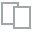
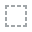
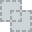
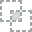
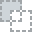
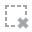
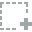
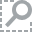
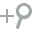
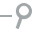
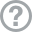
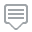
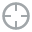
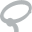
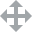
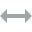
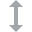
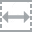
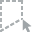
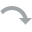
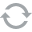
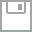
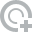
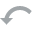
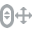
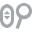
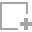
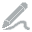
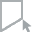
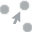
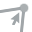
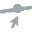

In [ ]:
from dataprep.eda import plot
plot(feature_engineering_dummy_train_set)


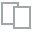
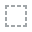
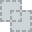
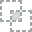
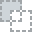
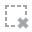
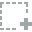
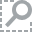
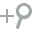
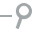
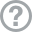
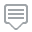
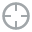
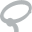
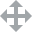
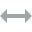
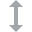
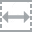
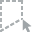
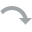
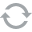
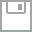
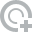
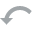
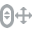
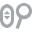
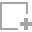
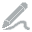
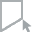
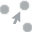
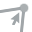
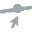

In [ ]:

plot(feature_engineering_dummy_train_set,'price')

1.5.3 regression plot

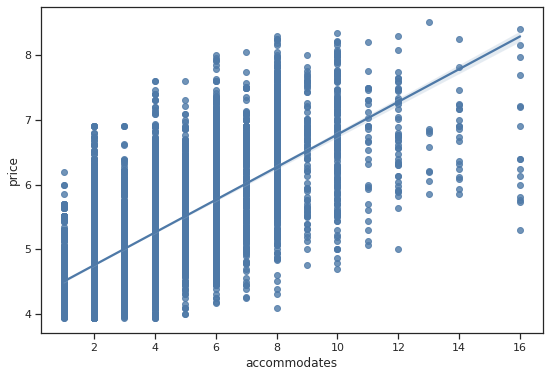

In [ ]:

sns.regplot(feature_engineering_dummy_train_set['accommodates'],feature_engineering_dummy_train_set['price'])
plt.show()

1.5.3.1 dealing with outliners Delete outliners

In [ ]:
print(feature_engineering_dummy_train_set.shape)
feature_engineering_dummy_train_set=feature_engineering_dummy_train_set[-((feature_engineering_dummy_train_set['bedrooms']>12.5)|(feature_engineering_dummy_train_set['host_total_listings_count']>5000)|(feature_engineering_dummy_train_set['bathrooms_text']>12))]
print(feature_engineering_dummy_train_set.shape)


(12941, 75)
(12940, 75)


1.5.4 Box plot

In [ ]:
print(feature_engineering_dummy_train_set.columns)

Index(['name', 'description', 'neighborhood_overview', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_lis

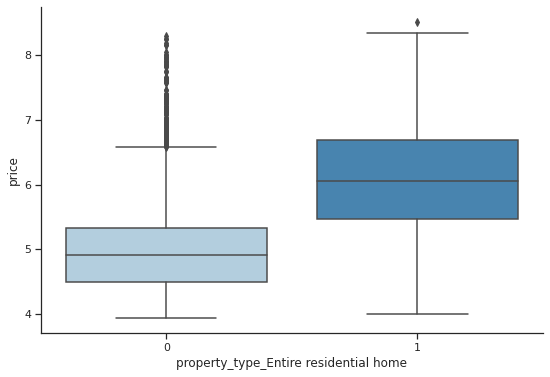

In [ ]:
sns.boxplot (x=feature_engineering_dummy_train_set. loc[:, 'property_type_Entire residential home'], y=feature_engineering_dummy_train_set. loc[:, 'price'], palette='Blues')
sns.despine()
plt.show()

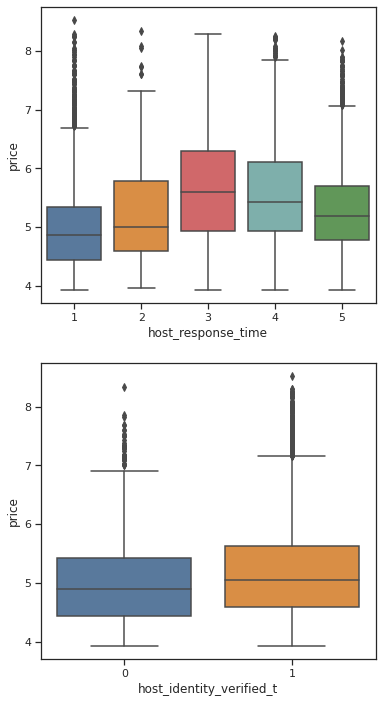

In [ ]:
f, axes =plt.subplots(2,1,figsize = (6, 12))
sns.boxplot(x =feature_engineering_dummy_train_set.loc[:,'host_identity_verified_t'], y=feature_engineering_dummy_train_set.loc[:,'price'])
sns.boxplot(x =feature_engineering_dummy_train_set['host_response_time'], y=feature_engineering_dummy_train_set['price'], ax =axes[0])


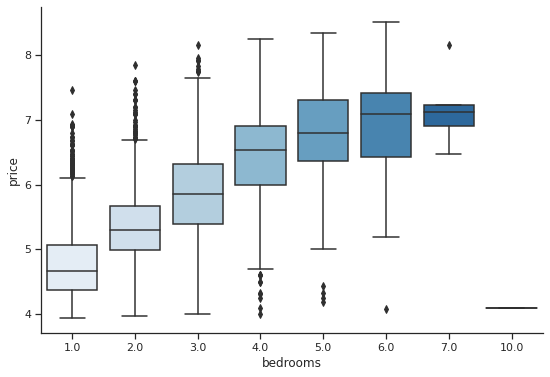

In [ ]:
#box plot
sns.boxplot(x =feature_engineering_dummy_train_set['bedrooms'], y=feature_engineering_dummy_train_set[response], palette ='Blues')
sns.despine()
plt.show()

1.5.5 correlation and dependence


1.5.5.1 processing

In [ ]:
corrmat = feature_engineering_dummy_train_set.corr()['price'].sort_values()
corrmat

room_type                                        -0.485113
property_type_Private room in rental unit        -0.340300
license_none                                     -0.269450
property_type_Private room in residential home   -0.263049
minimum_minimum_nights                           -0.220603
                                                    ...   
bathrooms_text                                    0.562557
beds                                              0.616593
accommodates                                      0.699254
bedrooms                                          0.703209
price                                             1.000000
Name: price, Length: 75, dtype: float64

In [ ]:
feature_engineering_correlation_train_set =feature_engineering_dummy_train_set[corrmat.loc[abs(corrmat) > 0.08].index]


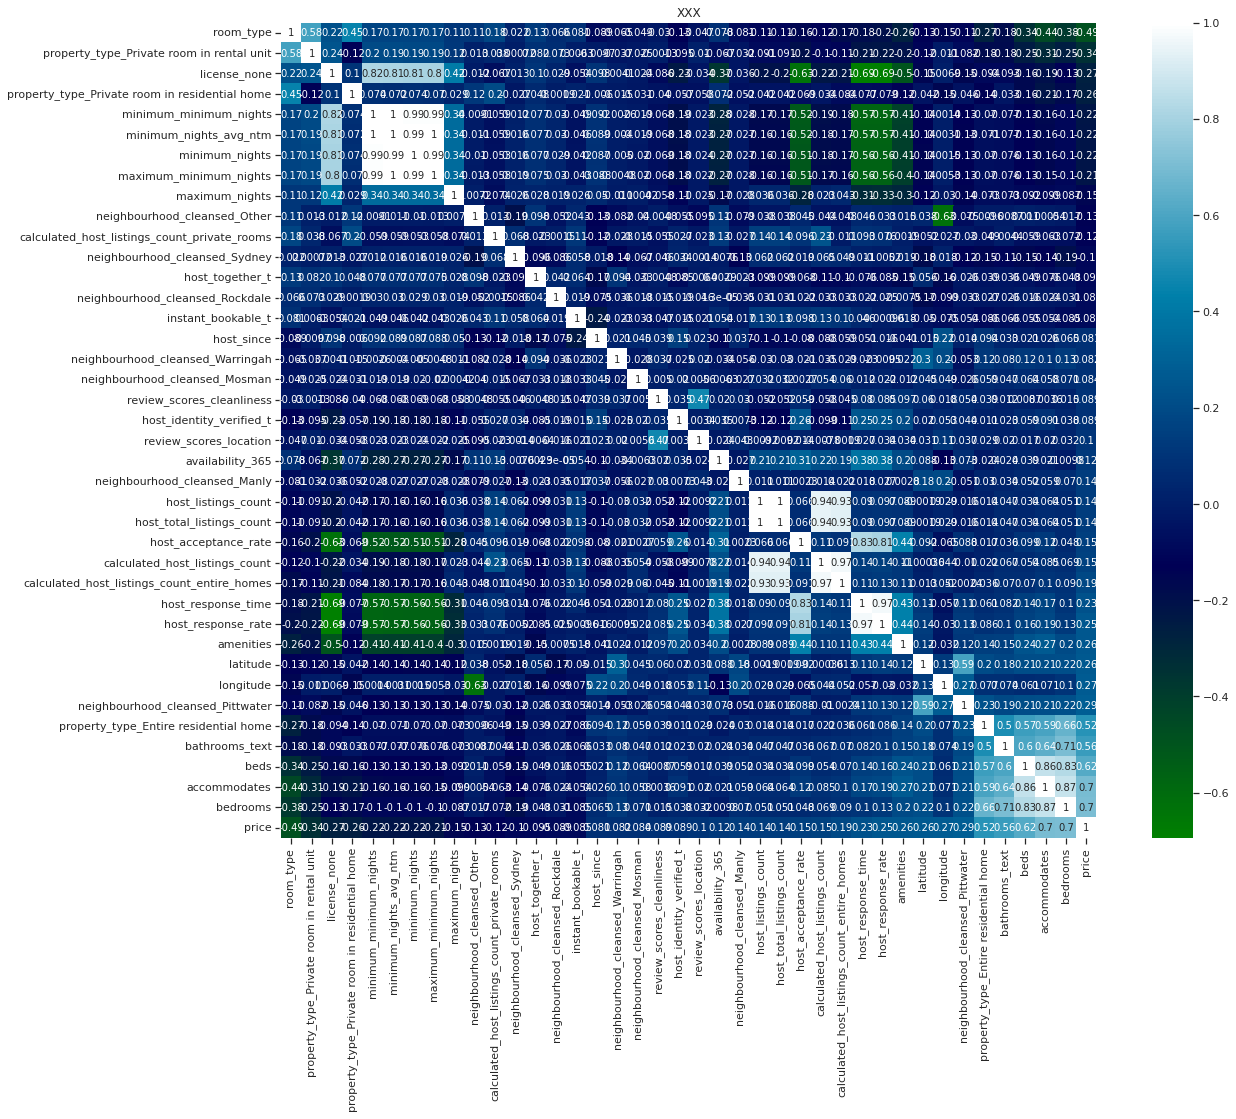

In [ ]:
plt.subplots (figsize=(20,15))
sns.heatmap(feature_engineering_correlation_train_set.corr(),  square = True, annot= True, cmap='ocean')

plt. title('Correlation Matrix')
plt.show()

In [ ]:
# # 通过这个看dependence ；可根据dependence 和 correlattion 删除不相关变量
# import phik
# feature_engineering_dummy_train_set.phik_matrix(interval_cols = continuous + discrete)[‘price’].sort_value(ascending = False).round(3)


SyntaxError: ignored

In [ ]:
# #drop 变量
# feature_engineering_dummy_train_set =feature_engineering_dummy_train_set.drop(['', '']，axis=1)
# feature_engineering_dummy_test_set =feature_engineering_dummy_test_set.drop(['', '']，axis=1)



In [ ]:
# feature_engineering_dummy_train_set[['latitude', 'longitude']].describe()

latitude    longitude
count 12940.000000 12940.000000
mean    -33.858134   151.204037
std       0.080281     0.089476
min     -34.092020   150.630490
25%     -33.897515   151.180108
50%     -33.880550   151.216865
75%     -33.823727   151.263833
max     -33.398740   151.340410

In [ ]:
# # This code is just for running - advanced code

# # import cartopy.crs as ccrs
# # import cartopy.feature as cfeature

# # Latitude and longitude for the edges of the map （find the number in EDA statisitical (sydney map))
# lat1, lat2, lon1, lon2 = 32, 42.5, -125, -114

# # Create figures
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1, 1, 1, projection = ccrs.Mercator())

# # Get latitude and longitude for each data point
# x, y = (feature_engineering_dummy_train_set['longitude'].to_numpy(), feature_engineering_dummy_train_set['latitude'].to_numpy())

# # Scatter plot as heat map
# ax.scatter(x, y, s=9, c=feature_engineering_dummy_train_set['price'].to_numpy(), 
#            edgecolors='none', cmap=plt.get_cmap('rainbow'), alpha=0.5, transform=ccrs.PlateCarree())

# # Add state borders and coast line
# ax.add_feature(cfeature.STATES.with_scale('50m'))
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
# ax.set_extent([-125, -113.5, 32, 42.5], crs=ccrs.PlateCarree())

# # Add title
# ax.set_title('house price in Sydeny (training data)', fontsize=17, y=1.01, fontweight='bold')

# plt.show()

Geometry must be a Point or LineString


1.6 interaction effect


In [ ]:
# # Eg.
# ax = sns.lmplot( 'accommodates', 'price', data =feature_engineering_dummy_train_set, hue = 'room_type_private room', height= 5, aspect = 1.4, ci = None, scatter_kws= ('s': 15, 'alpha' : 0.7), palette= np.arry(colors)[[4,0]]).ax
# ax.set_xlim()
# ax.set_ylim()
# plt.show()

In [ ]:
# ax = sns.lmplot( 'amenities', 'price', data =feature_engineering_dummy_train_set, hue = 'room_type_private room', height= 5, aspect = 1.4, ci = None, scatter_kws= ( 's': 15, 'alpha' : 0.7), palette= np.arry(colors)[[4,0]]).ax
# ax.set_xlim()
# ax.set_ylim()
# plt.show()

1.6.1 interaction features

In [ ]:
# feature_engineering_dummy_train_set['acco_roomtype'] =feature_engineering_dummy_train_set['accommodates']*feature_engineering_dummy_train_set['room_type_private room']
# feature_engineering_dummy_train_set['amen_hosttogether'] =feature_engineering_dummy_train_set['amenities']*feature_engineering_dummy_train_set['host_together_t']


In [ ]:
# feature_engineering_dummy_test_set['acco_roomtype'] =feature_engineering_dummy_test_set['accommodates']*feature_engineering_dummy_test_set['room_type_private room']
# feature_engineering_dummy_test_set['amen_hosttogether'] =feature_engineering_dummy_test_set['amenities']*feature_engineering_dummy_test_set['host_together_t']


NameError: ignored

In [ ]:
# feature_engineering_dummy_train_set['acco_roomtype'] 

In [ ]:
# x_train_original = feature_engineering_dummy_train_set.drop(['price'], axis=1)
# y_train_log = feature_engineering_dummy_train_set['price']
# x_test_original = feature_engineering_dummy_test_set

In [ ]:
# 1.8 data transformation

In [ ]:
# latitude 都是负数

In [ ]:
# x_train_original['latitude'] = -x_train_original['latitude']
# #

In [ ]:
# x_test_original['latitude'] = -x_test_original['latitude']

In [ ]:
# #先找出筛选variable后新的各类variable
# continuous_new = []
# discrete_new =[]
# dummy_new =[]
# for i in x_train_original.columns:
#     if x_train_original[i].value_counts().shape[0] > 20:
#         continuous_new. appled(i)
#     elif x_train_original[i]. value_counts().shape[0] == 2:
#         dummy_new.append[i]
#     else:
#         discrete_new.append(i)

# print('continuous_variable:{0}'.format(continuous_new))
# print('')
# print('dummy_variable:{0}'.format(dummy_new))
# print('')
# print('discrete_variable:{0}'.format(discrete_new))



In [ ]:
# #最好只对skew大于0的变量取log
# x_train_log = x_train_original.copy()
# x_train_log[continuous_new+discrete_new] = np.log1p(x_train_original[continuous_new+discrete_new] )

# x_test_log = x_train_original.copy()
# x_test_log[continuous_new+discrete_new] = np.log1p(x_test_original[continuous_new+discrete_new] )

1.9 Scaling
1.9.1 minimal

In [ ]:
# from sklearn. preprocessing import MinMaxScaler 

# x_train_log_minmax= x_train_log.copy()
# x_test_log_minmax= x_test_log.copy()

# labels = continuous_new+discrete_new
# scaler_minmax =MInMaxScaler().fit(x_train_log.loc[:, labels])
# x_train_log_minmax.loc[:, labels] = scaler_minmax.transform(x_train_log.loc[:, labels])
# x_test_log_minmax.loc[:, labels] = scaler_minmax.transform(x_test_log.loc[:, labels])



1.9.2 standardisation


In [ ]:
# from sklearn. preprocessing import StandardScaler

# x_train_log_standard= x_train_log.copy()
# x_test_log_standard= x_test_log.copy()

# labels = continuous_new+discrete_new
# scaler_standard=StandardScaler().fit(x_train_log.loc[:, labels])
# x_train_log_standard.loc[:, labels] = scaler_standard.transform(x_train_log.loc[:, labels])
# x_test_log_standard.loc[:, labels] = scaler_standard.transform(x_test_log.loc[:, labels])

In [ ]:
train_X = feature_engineering_dummy_train_set[feature_engineering_dummy_test_set.columns[1:]]
train_y = feature_engineering_dummy_train_set['price']
test_X = feature_engineering_dummy_test_set[feature_engineering_dummy_test_set.columns[1:]]



 2.1 Linear Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train_X)):
    train_data, test_data, train_target, test_target = train_X.values[train_index], train_X.values[test_index], train_y[train_index], train_y[test_index]
    model1 = LinearRegression()
    model1.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, model1.predict(train_data))
    score_test = mean_squared_error(test_target, model1.predict(test_data))
    print(k, 'Fold', 'LinearRegression train MSE:', score_train)
    print(k, 'Fold', 'LinearRegression test MSE:', score_test)
pred_test = pd.DataFrame(model1.predict(test_X))
outcome = pd.DataFrame()
outcome['id'] = feature_engineering_dummy_test_set['id']
outcome['price'] = pred_test
outcome.to_csv('/content/model1.csv', index = 0)

0 Fold LinearRegression train MSE: 0.191577001766601
0 Fold LinearRegression test MSE: 0.19204440190265024
1 Fold LinearRegression train MSE: 0.18936058474954842
1 Fold LinearRegression test MSE: 0.20070071693787864
2 Fold LinearRegression train MSE: 0.18981973092457582
2 Fold LinearRegression test MSE: 0.19866025591121325
3 Fold LinearRegression train MSE: 0.19131565304399187
3 Fold LinearRegression test MSE: 0.19291702272139374
4 Fold LinearRegression train MSE: 0.19265130363825236
4 Fold LinearRegression test MSE: 6620790.585236396


2.2 Random Forests

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train_X)):
    train_data, test_data, train_target, test_target = train_X.values[train_index], train_X.values[test_index], train_y[train_index], train_y[test_index]
    model2 = RandomForestRegressor(n_estimators = 300)
    model2.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, model2.predict(train_data))
    score_test = mean_squared_error(test_target, model2.predict(test_data))
    print(k, 'Fold', 'RF train MSE:', score_train)
    print(k, 'Fold', 'RF test MSE:', score_test)
pred_test = pd.DataFrame(model2.predict(test_X))
outcome = pd.DataFrame()
outcome['id'] = feature_engineering_dummy_test_set['id']
outcome['price'] = pred_test
outcome.to_csv('/content/model2.csv', index = 0)

2.3 xgboost

In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train_X)):
    train_data, test_data, train_target, test_target = train_X.values[train_index], train_X.values[test_index], train_y[train_index], train_y[test_index]
    model3 = XGBRegressor(n_estimators = 300)
    model3.fit(train_data, train_target)
    print(pd.DataFrame(model3.predict(train_data)).describe())
    score_train = mean_squared_error(train_target, model3.predict(train_data))
    score_test = mean_squared_error(test_target, model3.predict(test_data))
    print(k, 'Fold', 'xgb train MSE:', score_train)
    print(k, 'Fold', 'xgb test MSE:', score_test)
pred_test = pd.DataFrame(model3.predict(test_X, validate_features=False))
pred_test.describe()
outcome = pd.DataFrame()
outcome['id'] = feature_engineering_dummy_test_set['id']
outcome['price'] = pred_test
outcome.to_csv('/content/model3.csv', index = 0)

[09:01:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                 0
count 10352.000000
mean      5.144705
std       0.683843
min       3.936399
25%       4.655564
50%       5.022846
75%       5.451036
max       8.277929
0 Fold xgb train MSE: 0.13162470835956463
0 Fold xgb test MSE: 0.15720035993478626
[09:01:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                 0
count 10353.000000
mean      5.155192
std       0.683363
min       3.953381
25%       4.671492
50%       5.028749
75%       5.451921
max       8.277748
1 Fold xgb train MSE: 0.1281392275840809
1 Fold xgb test MSE: 0.1706255164910721
[09:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                 0
count 10353.000000
mean      5.149754
std       0.681909
min       3.911283
25%       4.662714

2.4 lgb

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train_X)):
    train_data, test_data, train_target, test_target = train_X.values[train_index], train_X.values[test_index], train_y[train_index], train_y[test_index]
    model4 = LGBMRegressor()
    model4.fit(train_data, train_target)
    print(pd.DataFrame(model4.predict(train_data)).describe())
    score_train = mean_squared_error(train_target, model4.predict(train_data))
    score_test = mean_squared_error(test_target, model4.predict(test_data))
    print(k, 'Fold', 'LGBM train MSE:', score_train)
    print(k, 'Fold', 'LGBM test MSE:', score_test)
pred_test = pd.DataFrame(model4.predict(test_X))
pred_test.describe()
outcome = pd.DataFrame()
outcome['id'] = feature_engineering_dummy_test_set['id']
outcome['price'] = pred_test
outcome.to_csv('/content/model4.csv', index = 0)

2.5 stacking

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
 
LGB = LGBMRegressor()
rf = RandomForestRegressor(n_estimators=300)
lr = LinearRegression()


kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train_X)):
    train_data, test_data, train_target, test_target = train_X.values[train_index], train_X.values[test_index], train_y[train_index], train_y[test_index]
    clf = StackingRegressor(regressors=[LGB, rf], meta_regressor= lr)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, 'Fold', 'Stacking train MSE:', score_train)
    print(k, 'Fold', 'Stacking test MSE:', score_test)
pred_test = pd.DataFrame(clf.predict(test_X))
pred_test.describe()
outcome = pd.DataFrame()
outcome['id'] = feature_engineering_dummy_test_set['id']
outcome['price'] = pred_test
outcome.to_csv('/content/model5.csv', index = 0)